# 01 Identifying individuals, variables and categorical variables in a data set

In [ ]:
import $ivy.`org.apache.spark::spark-sql:3.0.1`
import $ivy.`org.apache.spark::spark-mllib:3.0.1`
import $ivy.`org.plotly-scala::plotly-almond:0.8.0`

In [13]:
import plotly._, plotly.element._, plotly.layout._, plotly.Almond._
import org.apache.spark.sql._
import org.apache.spark.sql.types._
import org.apache.spark.ml.feature.StringIndexer
import scala.collection.mutable.LinkedHashMap
import org.apache.log4j.{Level, Logger}
Logger.getLogger("org").setLevel(Level.OFF)
repl.pprinter() = repl.pprinter().copy(defaultHeight = 1)

import plotly._, plotly.element._, plotly.layout._, plotly.Almond._

import org.apache.spark.sql._

import org.apache.spark.sql.types._

import org.apache.spark.ml.feature.StringIndexer

import scala.collection.mutable.LinkedHashMap

import org.apache.log4j.{Level, Logger}


[khanacademy](https://www.khanacademy.org/math/ap-statistics/analyzing-categorical-ap/analyzing-one-categorical-variable/v/identifying-individuals-variables-and-categorical-variables-in-a-data-set?modal=1)

![Identifying individuals, variables and categorical variables in a data set fig 1](./imgs/01-01-01.png)![Identifying individuals, variables and categorical variables in a data set fig 2](./imgs/01-01-02.png)

In [5]:
val spark = {
  NotebookSparkSession.builder.appName("statistics").master("local").getOrCreate()
}

Loading spark-stubs
Creating SparkSession


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties


Spark UI

spark: SparkSession = org.apache.spark.sql.SparkSession@61b11223

In [6]:
import spark.implicits._

import spark.implicits._

In [25]:
var dataset = LinkedHashMap(
    "Drink" -> Seq("Brewed coffee", "Caffe latte", "Caffe mocha", "Cappuccino", "Iced brewed coffee", "Chai latte"),
    "Type" -> Seq("Hot", "Hot", "Hot", "Hot", "Cold", "Hot"),
    "Calories" -> Seq(4, 100, 170, 60, 60, 120),
    "Sugars (g)" -> Seq(0, 14, 27, 8, 15, 25),
    "Caffein (mg)" -> Seq(260, 75, 95, 75, 120, 60)
    )

dataset: LinkedHashMap[String, Seq[Any]] = ...

In [14]:
val sdf = dataset.values
    .toList
    .transpose
    .map({ case List(a:String, b:String, c:Int, d:Int, e:Int) => (a, b, c, d, e) })
    .toDF(dataset.keys.toList:_*)
sdf.show()

+------------------+----+--------+----------+------------+
|             Drink|Type|Calories|Sugars (g)|Caffein (mg)|
+------------------+----+--------+----------+------------+
|     Brewed coffee| Hot|       4|         0|         260|
|       Caffe latte| Hot|     100|        14|          75|
|       Caffe mocha| Hot|     170|        27|          95|
|        Cappuccino| Hot|      60|         8|          75|
|Iced brewed coffee|Cold|      60|        15|         120|
|        Chai latte| Hot|     120|        25|          60|
+------------------+----+--------+----------+------------+



sdf: DataFrame = [Drink: string, Type: string ... 3 more fields]

In [16]:
val sdfIndex = new StringIndexer().setInputCol("Type").setOutputCol("Type_Cold").fit(sdf).transform(sdf)
sdfIndex.show()

collect at StringIndexer.scala:204

1 / 1

collect at StringIndexer.scala:204

1 / 1

+------------------+----+--------+----------+------------+----------+
|             Drink|Type|Calories|Sugars (g)|Caffein (mg)|Type_index|
+------------------+----+--------+----------+------------+----------+
|     Brewed coffee| Hot|       4|         0|         260|       0.0|
|       Caffe latte| Hot|     100|        14|          75|       0.0|
|       Caffe mocha| Hot|     170|        27|          95|       0.0|
|        Cappuccino| Hot|      60|         8|          75|       0.0|
|Iced brewed coffee|Cold|      60|        15|         120|       1.0|
|        Chai latte| Hot|     120|        25|          60|       0.0|
+------------------+----+--------+----------+------------+----------+



sdfIndex: DataFrame = [Drink: string, Type: string ... 4 more fields]

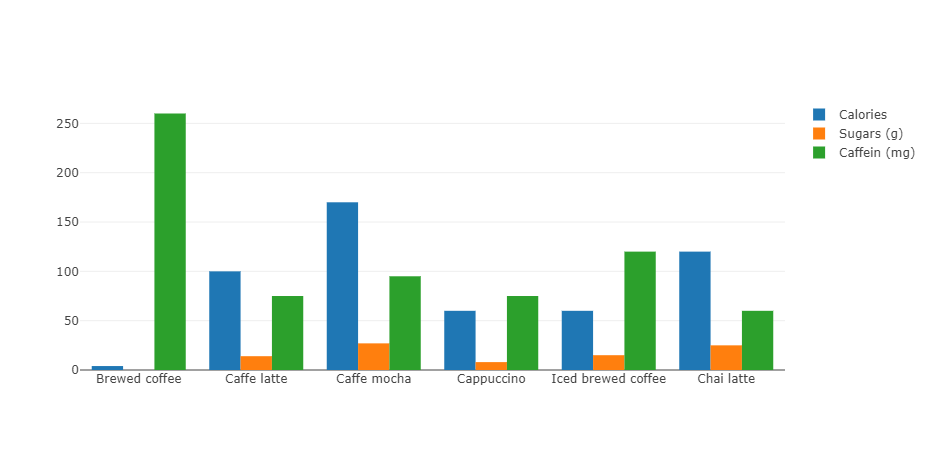

labels: Seq[String] = ...
calories: Seq[Int] = WrappedArray(4, 100, 170, 60, 60, 120)
sugars: Seq[Int] = WrappedArray(0, 14, 27, 8, 15, 25)
caffein: Seq[Int] = WrappedArray(260, 75, 95, 75, 120, 60)
data: Seq[Bar] = ...
res9_5: String = "plot-480dd3e8-e45a-4940-a7de-8a616872721a"

In [10]:
val labels = sdf.select("Drink").collect().map(_(0).asInstanceOf[String]).toSeq
val calories = sdf.select("Calories").collect().map(_(0).asInstanceOf[Int]).toSeq
val sugars = sdf.select("Sugars (g)").collect().map(_(0).asInstanceOf[Int]).toSeq
val caffein = sdf.select("Caffein (mg)").collect().map(_(0).asInstanceOf[Int]).toSeq
val data = Seq(
    Bar(labels, calories, name = "Calories"),
    Bar(labels, sugars, name = "Sugars (g)"),
    Bar(labels, caffein, name = "Caffein (mg)")
)

plot(data)